Preliminary Cosumnes Model Spin up
Michigan Bar to lower Rooney Ranch
Created on Thu Apr  2 17:59:11 2020

@author: Andrew

In [1]:
# For grid creation
import os
import sys
import numpy as np
# run installed version of flopy or add local path
try:
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference

import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import pyproj # for converting proj4string
import pandas as pd

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in C:\Users\ajcalder\anaconda3\lib\site-packages\flopy
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.18.1
matplotlib version: 3.1.3
flopy version: 3.3.0


According to Flopy GitHub "Technically you need to create both a SpatialReference object and a ModelGrid object, but in practice the code looks very similar and can easily be implemented in one line."
WGS84 Zone 10N has EPSG: 32610
Lower left corner of model is 
Zone 10 N
Easting: 661211.18 m E
Northing: 4249696.50 m N
angle is approximate 53 degrees

In [163]:
mg = StructuredGrid(delc=200*np.ones(52), delr=200*np.ones(81), xoff=661211.18, yoff=4249696.50, angrot=53, 
                    epsg=32610, lenuni=1)

## Transform, xcenters, xedges  
Transform, xcenters, xedges behaves the same but is now a method of the ModelGrid, but has the same functionatily.

In [50]:
mg.get_coords(1, 1)


(661211.9911595754, 4249697.658455931)

In [42]:
mg.get_local_coords(11.82170571129881, 13.906660505012088)

(-2029465.5415451624, 3791867.1325907875)

Methods to get cell centers of cells from the model grid are now in the ModelGrid classes.

In [43]:
mg.xcellcenters[1, 7] # x-coordinate at row 1, column 7


661203.0838810937

In [44]:
mg.xcellcenters[[1, 3], [7, 7]]

array([661203.08388109, 661204.28751114])

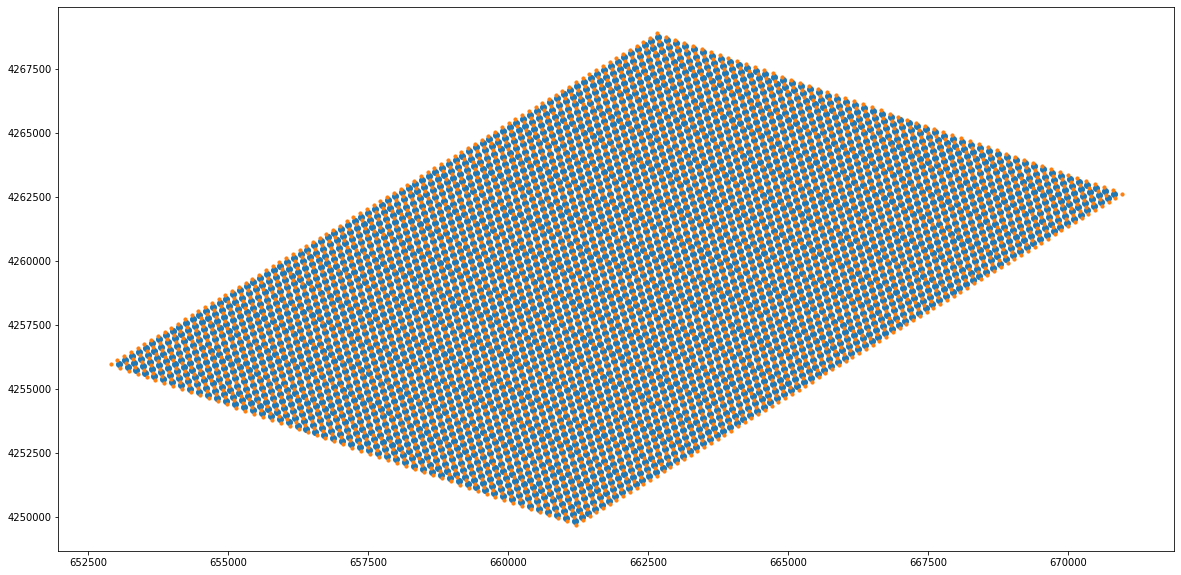

In [165]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(mg.xcellcenters.ravel(), mg.ycellcenters.ravel())
plt.scatter(mg.xyzvertices[0].ravel(), mg.xyzvertices[1].ravel(), s=10)

## Grid lines

In [52]:
def plot_lines(lines):
    fig, ax = plt.subplots()
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]])

In [134]:
spath = "C://Users/ajcalder/Box/Research_Calderwood/dem"
df = pd.read_csv(spath+"/allsensor_latlong.csv", parse_dates = True, 
                index_col = 0, sep = ',', header = 'infer')

lat = df.Latitude.values
lon = df.Longitude.values
crs_wgs = pyproj.CRS("epsg:4326")
crs_utm = pyproj.CRS("epsg:32610")
transformer = pyproj.Transformer.from_crs(crs_wgs, crs_utm, always_xy = True)
# Convert WGS Lat and long to Easting and Northing in Zone 10N
east, north = transformer.transform(lon,lat)

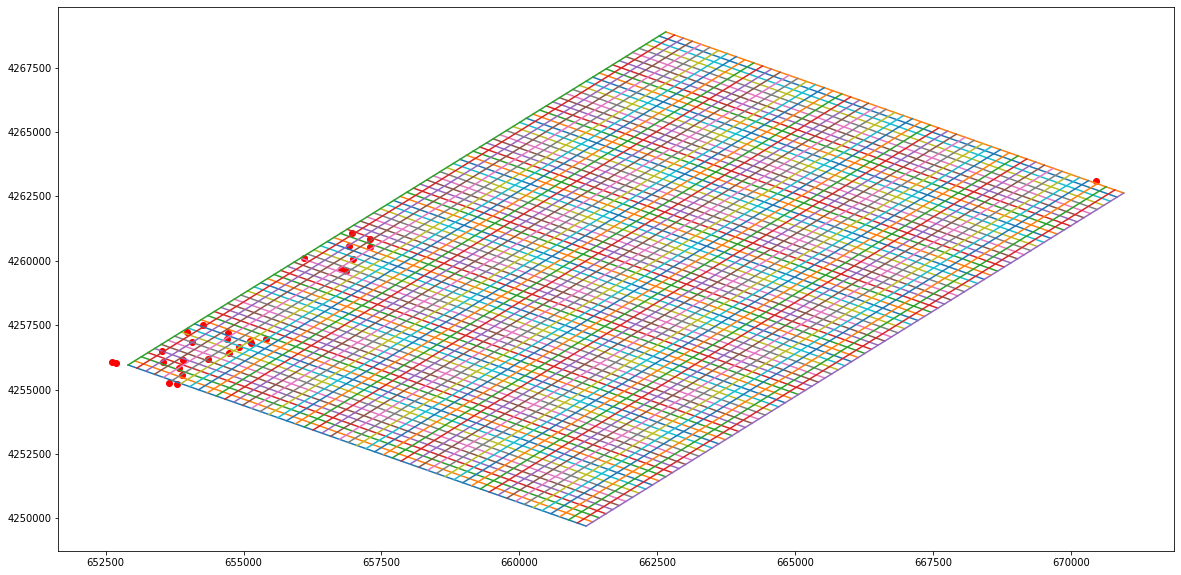

In [164]:


plt.rcParams["figure.figsize"] = (20,10)
fig = plot_lines(mg.grid_lines)
plt.scatter(east, north, c='r')


In [168]:
# For raster intersect
import time
import shapely
# import shapefile

try:
    import flopy
    from flopy.utils import Raster
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy
    from flopy.utils import Raster
    
print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('pandas version: {}'.format(pd.__version__))
print('shapely version: {}'.format(shapely.__version__))
print('flopy version: {}'.format(flopy.__version__))  

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.18.1
matplotlib version: 3.1.3
pandas version: 1.0.1
shapely version: 1.7.0
flopy version: 3.3.0


In [169]:
raster_ws = os.path.join("..", "data", "options", "dem")
raster_name = "dem.img"

rio = Raster.load(os.path.join(raster_ws, raster_name))

ImportError: Raster().load(): error importing rasterio - try "pip install rasterio"